# Dataset Analysis
In this notebook, the cleaned and reannotated dataset ("ReferenceErrorDetection_data_extended_annotation") is analyzed by plotting the label distribution and annotation attribute distributions.

The original dataset by Zhang and Abernethy (paper: https://arxiv.org/abs/2411.06101, Github: https://github.com/tianmai-zhang/ReferenceErrorDetection) was modified to fit the requirements for this master's thesis following these steps:

- Converting all citations in IEEE style
- Adding additional citation and reference mentions back to the sentences (but without adding any dataset entries): The column "Reference Number" was added to know which IEEE citation number belongs to the reference paper of the dataset row
- Adding all cut-off sentence parts for the citation statements or relevant surrounding sentences 
- Adding information for if the citing or reference articles are already retracted

Additionally, the following annotation attributes were added to analyze possible relationships between linguistic citation statement features and the LLM classification performance:

- <b>Amount of Citations in Statement:</b> <br>
Total number of citations within the citation
statement. Each IEEE style citation occurrence “[x,
y, . . . ]” is counted as a separate citation.
- <b>Amount of References for Main Citation:</b> <br>
Total number of reference numbers within the IEEE
style citation that belongs to the main citation, which
contains the reference number corresponding to the
reference paper of that data row.
- <b>Amount of Claims to Substantiate:</b> <br>
Interval of possible amounts of claims that should be
substantiated by the reference paper as part of the
main citation. The exact amount of covered claims
intended by the citation paper author(s) should lie
within this interval, but is – within this dataset –
often not clear from analyzing the grammatical
structure or context from the given statement alone.
- <b>Citation Sentence Structure:</b> <br>
Complexity of the sentence structure in relation to
the number of relevant clauses for the citation.<br>
• Simple: Single sentence with only one clause
which contains the citation.<br>
• Complex_Single_Clause: Multiple connected
sentences or compound sentence(s) with multiple
clauses, where only one clause contains the
citation.<br>
• Complex_Multiple_Clauses: Multiple connected
sentences or compound sentence(s) with multiple
clauses, where multiple clauses contain claims that
should be substantiated by the citation.<br>
- <b>Claim Contains Number or Formula:</b> <br>
Expresses whether the citation statement contains
any number or mathematical/technical formula
(which could also include numbers) that are
semantically relevant to the main citation, meaning
that they would need to be verified against the
reference paper in the classification process.
- <b>Simple Topical Reference:</b> <br>
If Yes, the purpose of the citation is to mention
another paper as an example reference for a certain
topic, technical term, or method without including a
specific quantitative or qualitative claim about the
reference papers’ findings.

In [1]:
%run ../scripts/data_visualizations.py

In [2]:
import pandas as pd

In [3]:
# read the xlsx data into a pandas dataframe
df = pd.read_excel('../data/ReferenceErrorDetection_data_extended_annotation.xlsx')

# drop the rows where reference article could not be downloaded
df = df[df["Reference Article Downloaded"] == "Yes"].reset_index(drop=True)

In [4]:
df.head()

,Source,Citing Article ID,Citing Article DOI,Citing Article Title,Citing Article Retracted,Citing Article Downloaded,Domain,Citation ID,Statement with Citation,Corrected Statement,...,Reference Article Title,Reference Article Abstract,Reference Article PDF Available,Reference Article Retracted,Reference Article Downloaded,Label,Explanation,Error Type,Added,Previously Partially Substantiated
0,PubPeer,c001,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Yes,Yes,Engineering,cit001_1,Others have aimed to reduce irreversibility or...,Others have aimed to reduce irreversibility or...,...,A Fault Analysis Method for Three-Phase Induct...,The fault prediction and abductive fault diagn...,Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No,NaN
1,PubPeer,c001,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Yes,Yes,Engineering,cit001_2,Some researchers have also studied various hea...,Some researchers have also studied various hea...,...,Develop 24 dissimilar ANNs by suitable archite...,The artificial neural network optimization met...,Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No,NaN
2,PubPeer,c002,10.1155/2022/4601350,Oxidative Potential and Nanoantioxidant Activi...,Yes,Yes,Chemistry,cit002_1,The relative content of total flavonoids in th...,The relative content of total flavonoids in th...,...,Lipid Data Acquisition for devices Treatment o...,"Recently, the widespread deployment of smart p...",Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No,NaN
3,PubPeer,c003,10.1155/2022/2408685,The Choice of Anesthetic Drugs in Outpatient H...,Yes,Yes,Medicine,cit003_1,Research has shown that remimazolam tosylate e...,Research has shown that remimazolam tosylate e...,...,"Effect of propofol on breast cancer cell, the ...",Breast cancer is the second leading cause of c...,Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No,NaN
4,PubPeer,c004,10.1155/2022/4783847,A Fault-Tolerant Structure for Nano-Power Comm...,Yes,Yes,Engineering,cit004_1,if the efficiency of the routing algorithm is ...,If the efficiency of the routing algorithm is ...,...,Analysis and research hotspots of ceramic mate...,"From the perspective of scientometrics, comb t...",Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No,NaN


## Distribution of General Data Columns (Source, Domain)

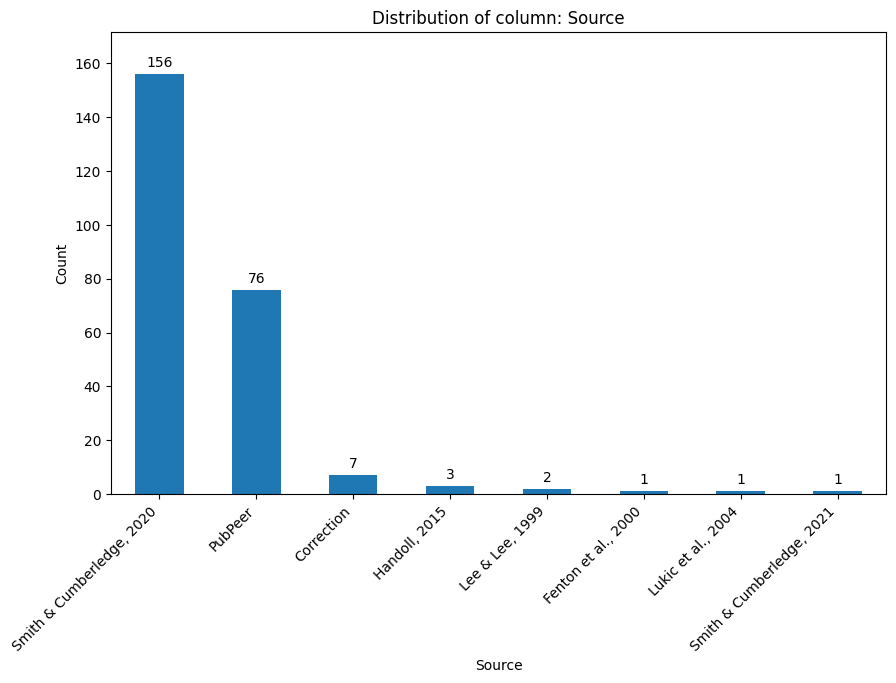

In [5]:
show_distribution(df, "Source")

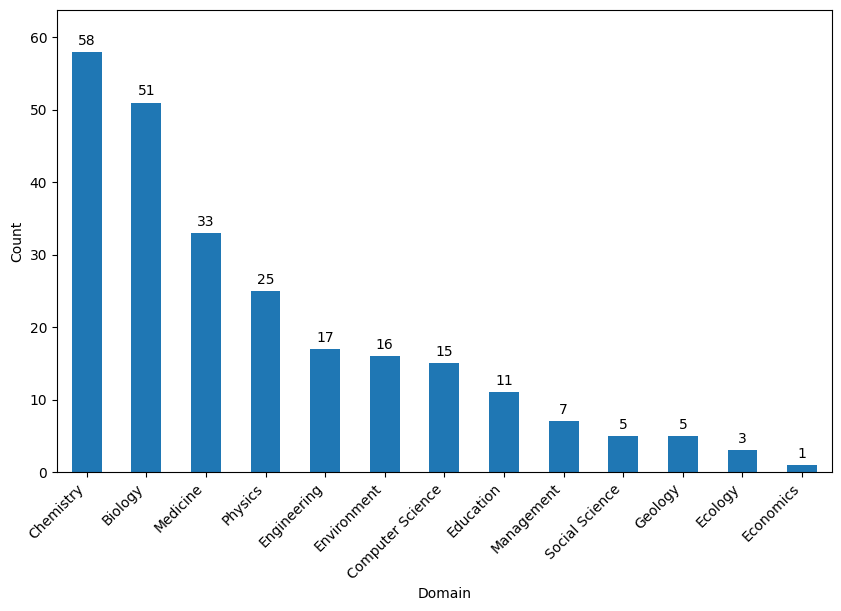

In [6]:
show_distribution(df, "Domain", save_title="domain_distribution")

## Label Distribution: Before / After Re-Annotation

In [7]:
substantiated_count = (df["Label"] == "Substantiated").sum()
unsubstantiated_count = (df["Label"] == "Unsubstantiated").sum()
total = substantiated_count + unsubstantiated_count

substantiated_pct = substantiated_count / total * 100
unsubstantiated_pct = unsubstantiated_count / total * 100

print(f"Substantiated: {substantiated_pct:.1f}%")
print(f"Unsubstantiated: {unsubstantiated_pct:.1f}%")

Substantiated: 53.4%
Unsubstantiated: 46.6%


In [8]:
# This data was directly taken from analyzing the datasets in Excel:
label_distribution = {
    "Original Dataset": {
        "Fully Substantiated": 124,
        "Partially Substantiated": 14,
        "Unsubstantiated": 109
    },
    "Re-Annotated Dataset": {
        "Substantiated": 132,
        "Unsubstantiated": 115
    }
}

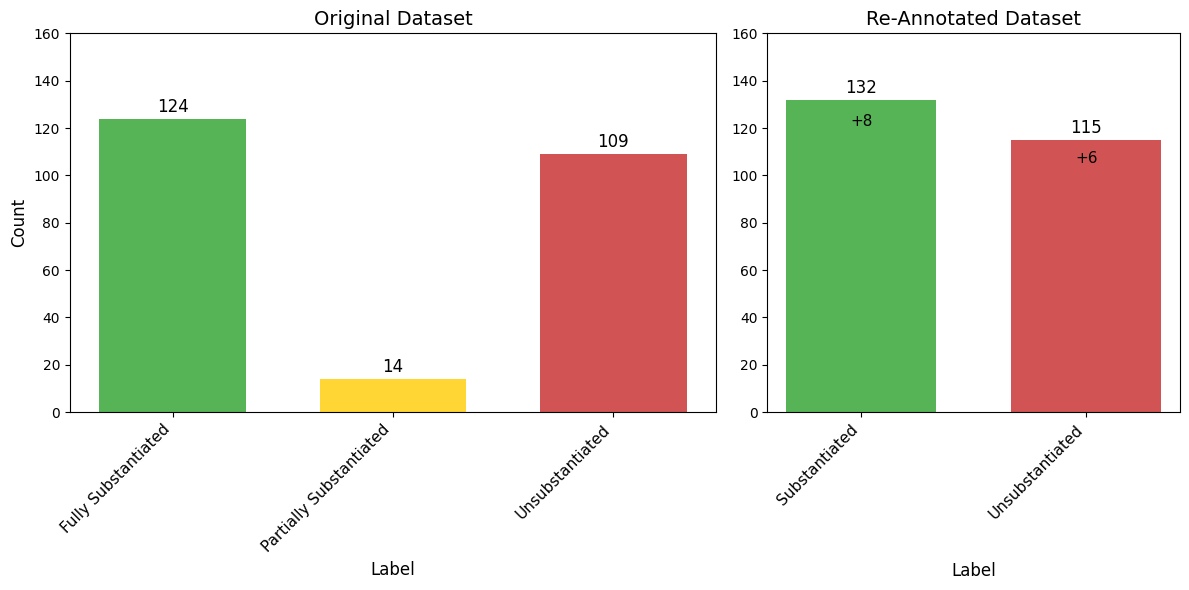

In [9]:
show_label_dist_comparison(label_distribution, save_title="label_distribution_comparison")

## Retracted Articles

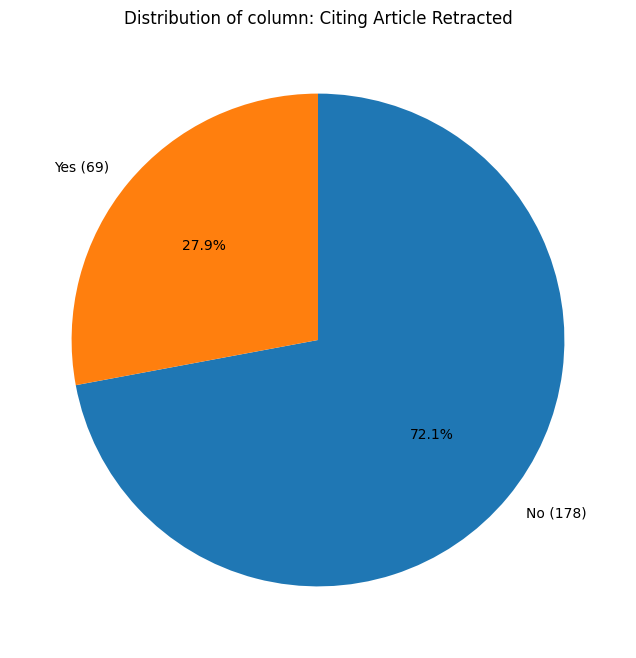

In [10]:
show_distribution_pie(df, "Citing Article Retracted")

## Distributions of Added Annotation Attributes

In [11]:
def label_counts_by_column(df, column):
    """
    For each unique value in the specified column, count how often each 'Label' value occurs.
    Returns two DataFrames:
      - counts: counts of each Label as columns
      - percentages: percentage of 'Substantiated' and 'Unsubstantiated' labels
    """
    counts = df.groupby(column)['Label'].value_counts().unstack(fill_value=0)
    display(counts)
    total = counts.sum(axis=1)
    percentages = pd.DataFrame({
        'Substantiated %': round(counts.get('Substantiated', 0) / total * 100, 1),
        'Unsubstantiated %': round(counts.get('Unsubstantiated', 0) / total * 100, 1)
    })
    display(percentages)

### Reference Only

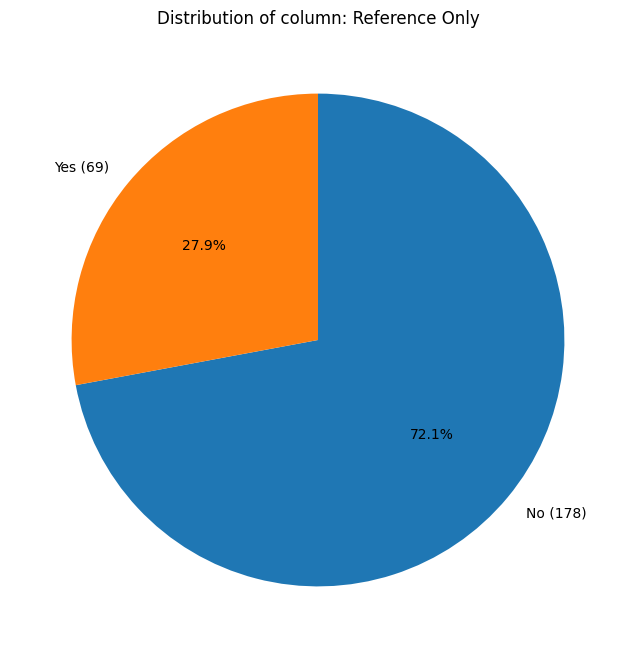

In [12]:
show_distribution_pie(df, "Reference Only")

In [13]:
label_counts_by_column(df, "Reference Only")

Label,Substantiated,Unsubstantiated
Reference Only,,
No,87,91
Yes,45,24


,Substantiated %,Unsubstantiated %
Reference Only,,
No,48.9,51.1
Yes,65.2,34.8


### Claim Contains Number or Formula

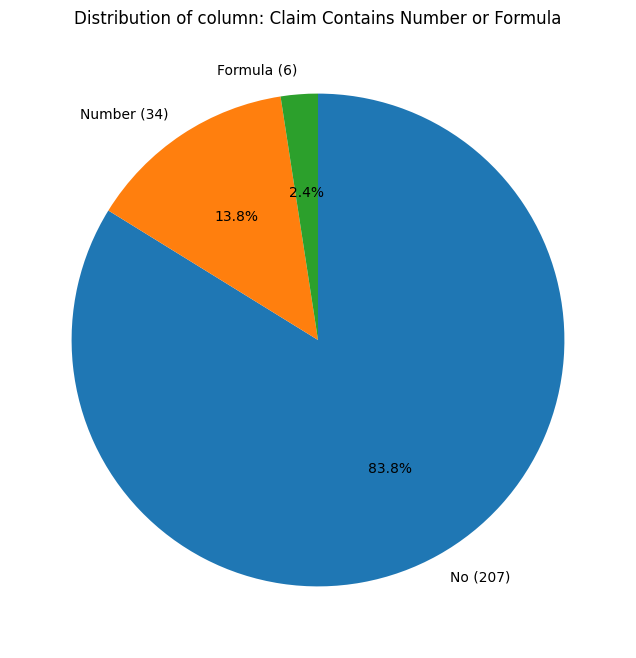

In [14]:
show_distribution_pie(df, "Claim Contains Number or Formula")

In [15]:
label_counts_by_column(df, "Claim Contains Number or Formula")

Label,Substantiated,Unsubstantiated
Claim Contains Number or Formula,,
Formula,2,4
No,110,97
Number,20,14


,Substantiated %,Unsubstantiated %
Claim Contains Number or Formula,,
Formula,33.3,66.7
No,53.1,46.9
Number,58.8,41.2


### Amount of Citations in Sentence

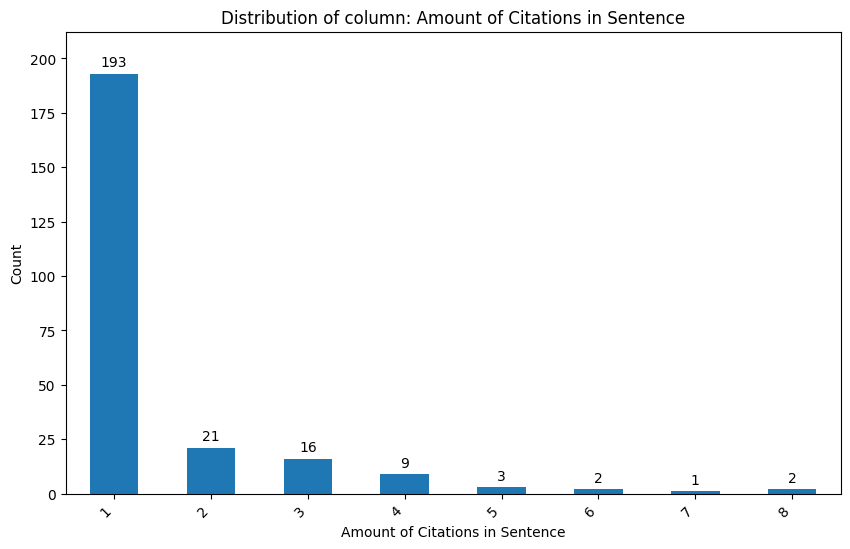

In [16]:
citation_amounts = list(df["Amount Citations in Sentence"].unique())
citation_amounts.sort()
show_distribution(df, "Amount Citations in Sentence", sorting=citation_amounts, display_name="Amount of Citations in Sentence")

In [17]:
label_counts_by_column(df, "Amount Citations in Sentence")

Label,Substantiated,Unsubstantiated
Amount Citations in Sentence,,
1,90,103
2,16,5
3,13,3
4,7,2
5,3,0
6,2,0
7,1,0
8,0,2


,Substantiated %,Unsubstantiated %
Amount Citations in Sentence,,
1,46.6,53.4
2,76.2,23.8
3,81.2,18.8
4,77.8,22.2
5,100.0,0.0
6,100.0,0.0
7,100.0,0.0
8,0.0,100.0


### Amount of References for Claim

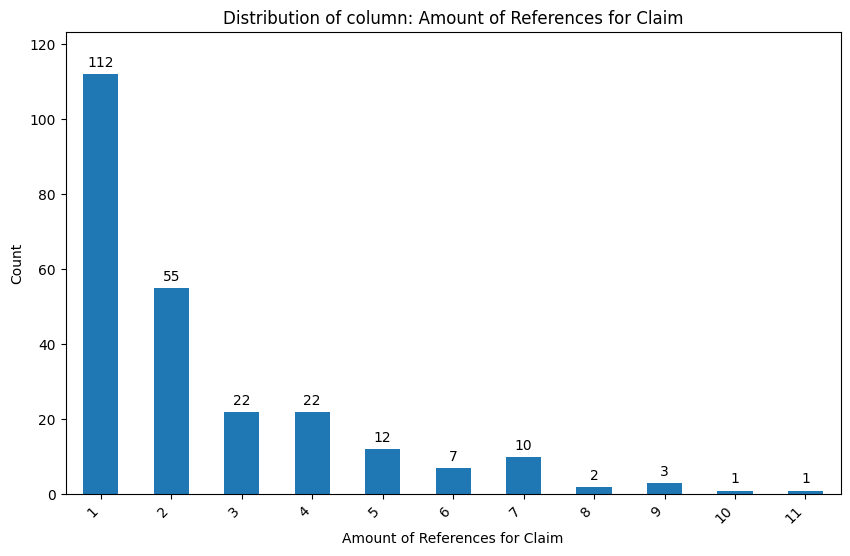

In [18]:
references_amounts = list(df["Amount References for Claim"].unique())
references_amounts.sort()
show_distribution(df, "Amount References for Claim", sorting=references_amounts, display_name="Amount of References for Claim")

In [19]:
label_counts_by_column(df, "Amount References for Claim")

Label,Substantiated,Unsubstantiated
Amount References for Claim,,
1,56,56
2,31,24
3,15,7
4,10,12
5,7,5
6,4,3
7,3,7
8,1,1
9,3,0


,Substantiated %,Unsubstantiated %
Amount References for Claim,,
1,50.0,50.0
2,56.4,43.6
3,68.2,31.8
4,45.5,54.5
5,58.3,41.7
6,57.1,42.9
7,30.0,70.0
8,50.0,50.0
9,100.0,0.0


### Claim Sentence Structure

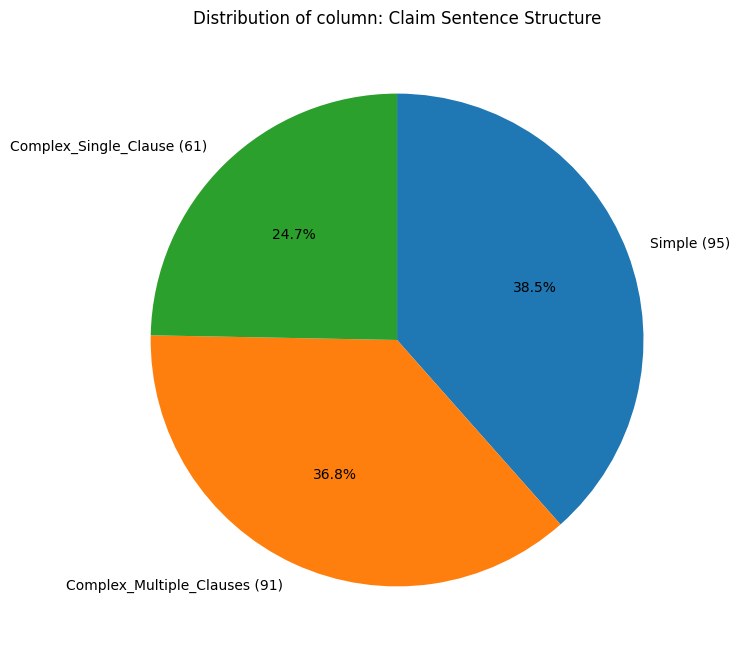

In [20]:
show_distribution_pie(df, "Claim Sentence Structure")

In [21]:
label_counts_by_column(df, "Claim Sentence Structure")

Label,Substantiated,Unsubstantiated
Claim Sentence Structure,,
Complex_Multiple_Clauses,53,38
Complex_Single_Clause,43,18
Simple,36,59


,Substantiated %,Unsubstantiated %
Claim Sentence Structure,,
Complex_Multiple_Clauses,58.2,41.8
Complex_Single_Clause,70.5,29.5
Simple,37.9,62.1


### Amount of Claims to Substantiate

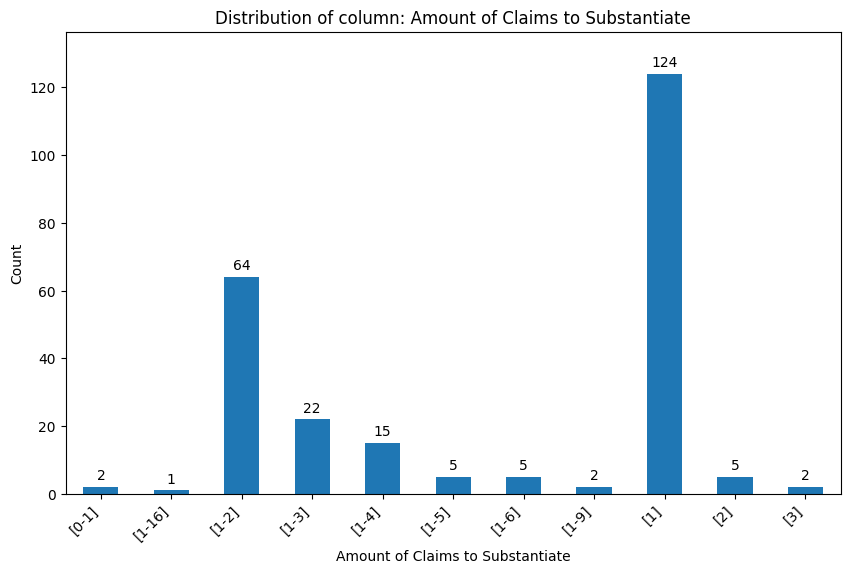

In [22]:
claims_amounts = list(df["Amount Claims to Substantiate"].unique())
claims_amounts.sort()
show_distribution(df, "Amount Claims to Substantiate", sorting=claims_amounts, display_name="Amount of Claims to Substantiate")


In [23]:
for idx, row in df.iterrows():
    amount_claims = row["Amount Claims to Substantiate"]
    min_amount = None
    max_amount = None

    if "-" in str(amount_claims):
        min_amount = int(amount_claims[1:amount_claims.index("-")])
        max_amount = int(amount_claims[amount_claims.index("-") + 1:-1])
    else:
        single_number = int(amount_claims[1:-1])
        min_amount = single_number
        max_amount = single_number
    
    df.at[idx, "Min Amount Claims to Substantiate"] = min_amount
    df.at[idx, "Max Amount Claims to Substantiate"] = max_amount

# Convert to integer dtype after processing
df["Min Amount Claims to Substantiate"] = df["Min Amount Claims to Substantiate"].astype(int)
df["Max Amount Claims to Substantiate"] = df["Max Amount Claims to Substantiate"].astype(int)

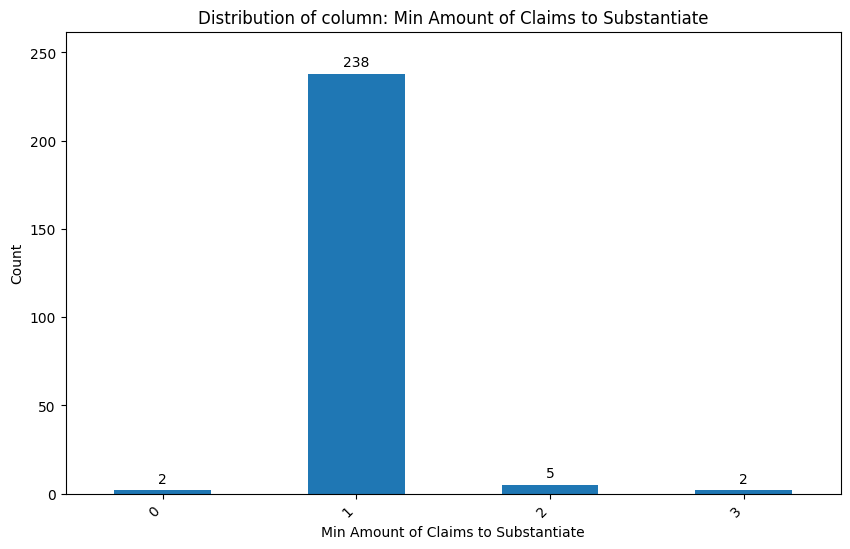

In [24]:
min_claims_amounts = list(df["Min Amount Claims to Substantiate"].unique())
min_claims_amounts.sort()
show_distribution(df, "Min Amount Claims to Substantiate", sorting=min_claims_amounts, display_name="Min Amount of Claims to Substantiate")

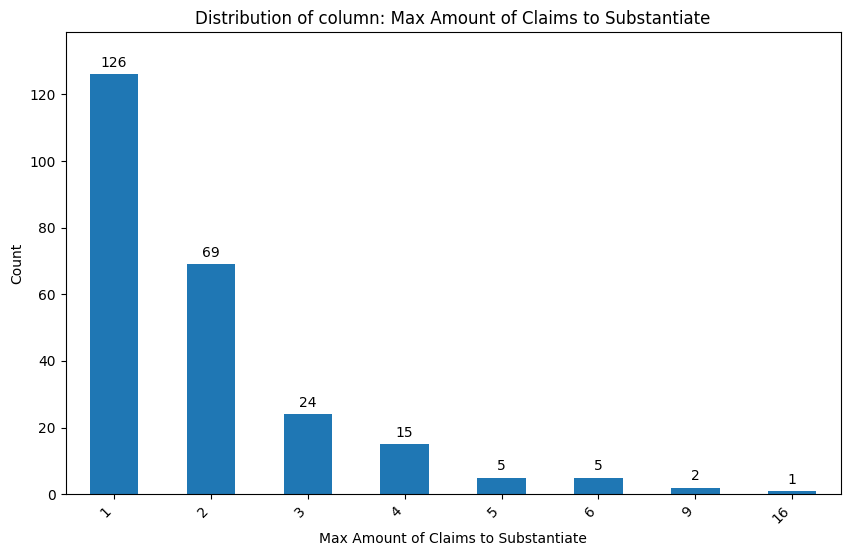

In [25]:
max_claims_amounts = list(df["Max Amount Claims to Substantiate"].unique())
max_claims_amounts.sort()
show_distribution(df, "Max Amount Claims to Substantiate", sorting=max_claims_amounts, display_name="Max Amount of Claims to Substantiate")

In [26]:
label_counts_by_column(df, "Max Amount Claims to Substantiate")

Label,Substantiated,Unsubstantiated
Max Amount Claims to Substantiate,,
1,75,51
2,31,38
3,13,11
4,9,6
5,1,4
6,3,2
9,0,2
16,0,1


,Substantiated %,Unsubstantiated %
Max Amount Claims to Substantiate,,
1,59.5,40.5
2,44.9,55.1
3,54.2,45.8
4,60.0,40.0
5,20.0,80.0
6,60.0,40.0
9,0.0,100.0
16,0.0,100.0


### Error Type

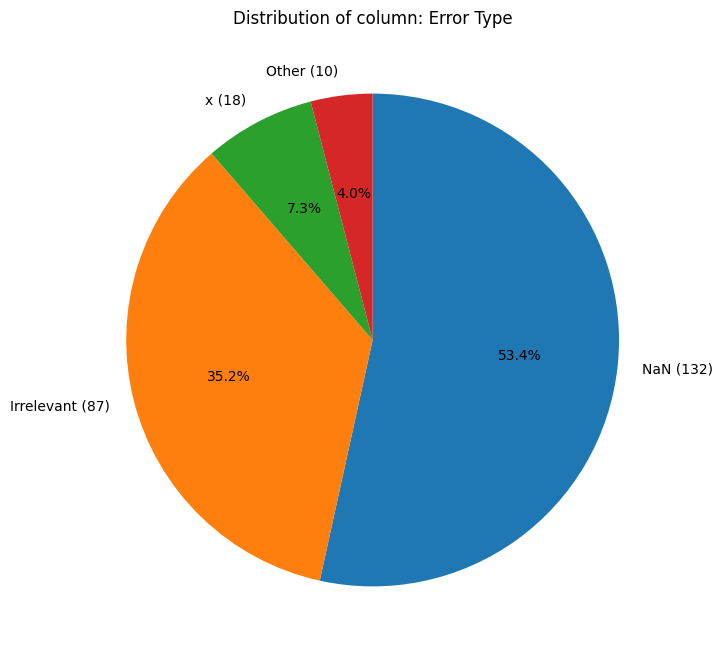

In [27]:
show_distribution_pie(df, "Error Type")

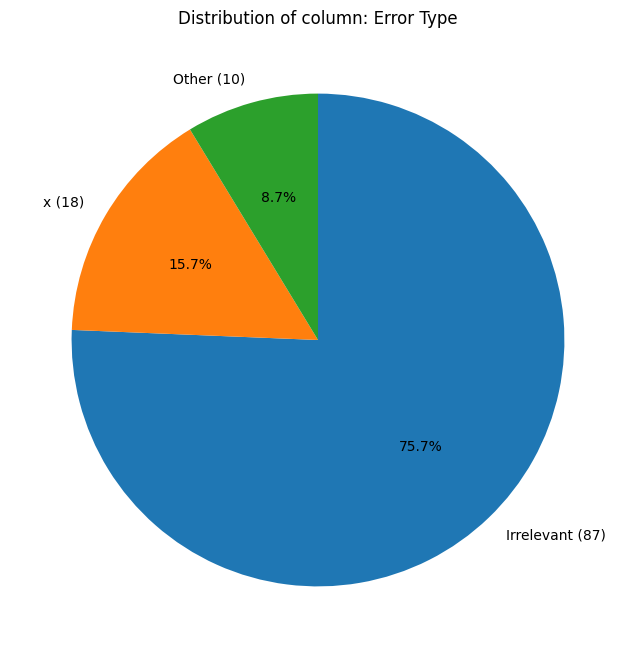

In [28]:
show_distribution_pie(df, "Error Type", include_nan=False)

### Summarized Plots for Thesis

In [29]:
annotation_attributes_dict = {
    "Amount Citations in Statement": dict(sorted(dict(df["Amount Citations in Sentence"].value_counts()).items())),
    "Amount References for Main Citation": dict(sorted(dict(df["Amount References for Claim"].value_counts()).items())),
}

attribute_name_changes = {
    "Amount Citations in Statement": "Amount of Citations in Statement",
    "Amount References for Main Citation": "Amount of References for Main Citation",
}

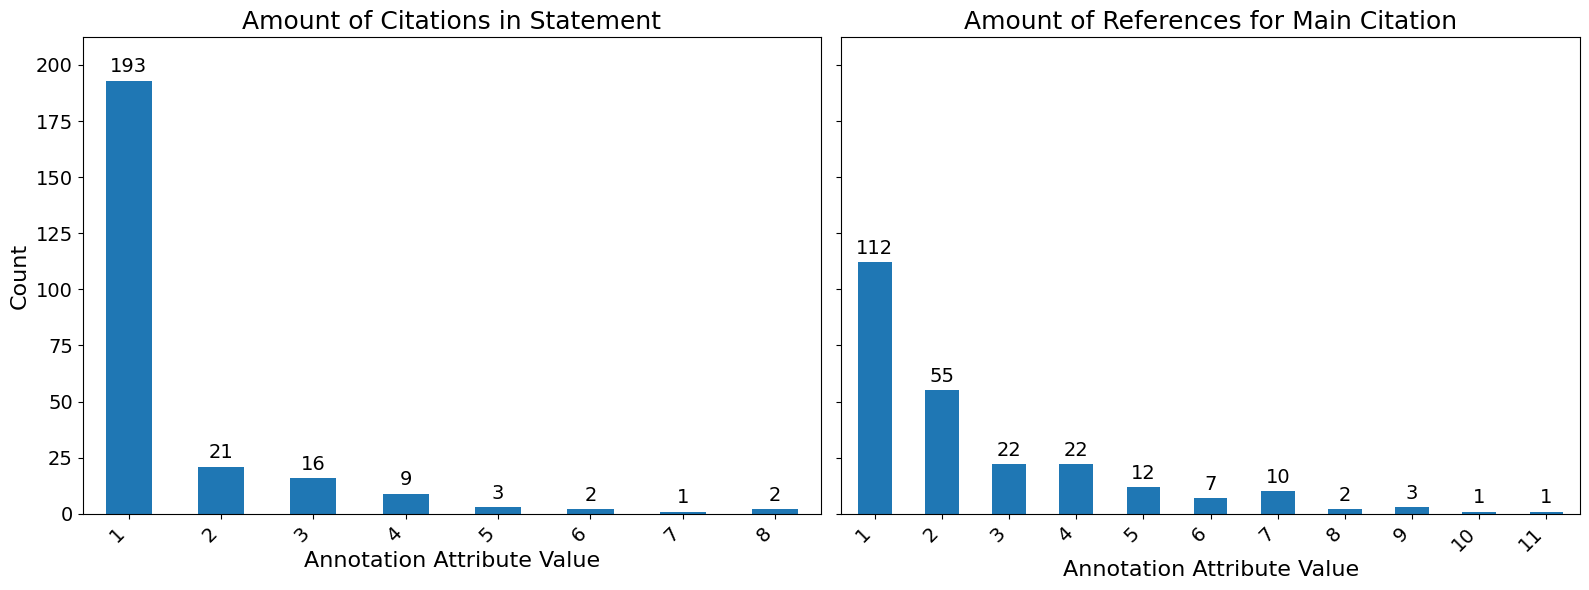

In [30]:
show_distribution_dict_comparison(annotation_attributes_dict, save_title="amounts_citations_and_references", attribute_name_changes=attribute_name_changes)

In [31]:
sentence_structure_order = ["Simple", "Complex_Single_Clause", "Complex_Multiple_Clauses"]

annotation_attributes_dict = {
    "Citation Sentence Structure": dict(sorted(
        dict(df["Claim Sentence Structure"].value_counts()).items(),
        key=lambda x: sentence_structure_order.index(x[0]) if x[0] in sentence_structure_order else len(sentence_structure_order)
    )),
    "Claim Contains Number or Formula": dict(df["Claim Contains Number or Formula"].value_counts()),
}

In [32]:
annotation_attributes_dict

{'Citation Sentence Structure': {'Simple': np.int64(95),
  'Complex_Single_Clause': np.int64(61),
  'Complex_Multiple_Clauses': np.int64(91)},
 'Claim Contains Number or Formula': {'No': np.int64(207),
  'Number': np.int64(34),
  'Formula': np.int64(6)}}

In [33]:
attribute_value_name_changes = {
    'Citation Sentence Structure': {
        'Simple': 'Simple', 
        'Complex_Single_Clause': 'Complex_\nSingle_\nClause', 
        'Complex_Multiple_Clauses': 'Complex_\nMultiple_\nClauses'
    }
}

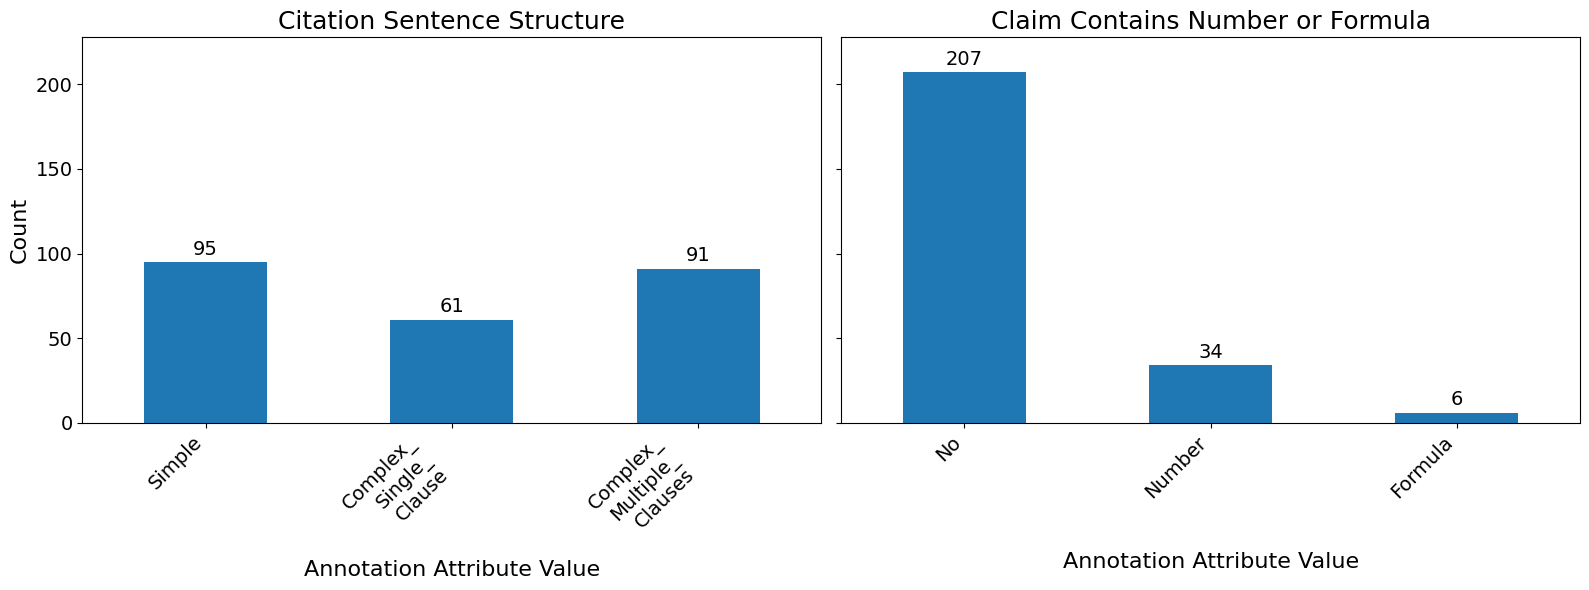

In [34]:
show_distribution_dict_comparison(annotation_attributes_dict, save_title="dist_sentence_structure_and_formula", left_xlabel_pad=10, right_xlabel_pad=36, attribute_value_name_changes=attribute_value_name_changes)

In [35]:
annotation_attributes_dict = {
    "Simple Topical Reference": dict(df["Reference Only"].value_counts()),
    "Amount Claims to Substantiate (Maximum)": dict(sorted(dict(df["Max Amount Claims to Substantiate"].value_counts()).items())),
}

attribute_name_changes = {
    "Amount Claims to Substantiate (Maximum)": "Amount of Claims to Substantiate (Maximum)",
}

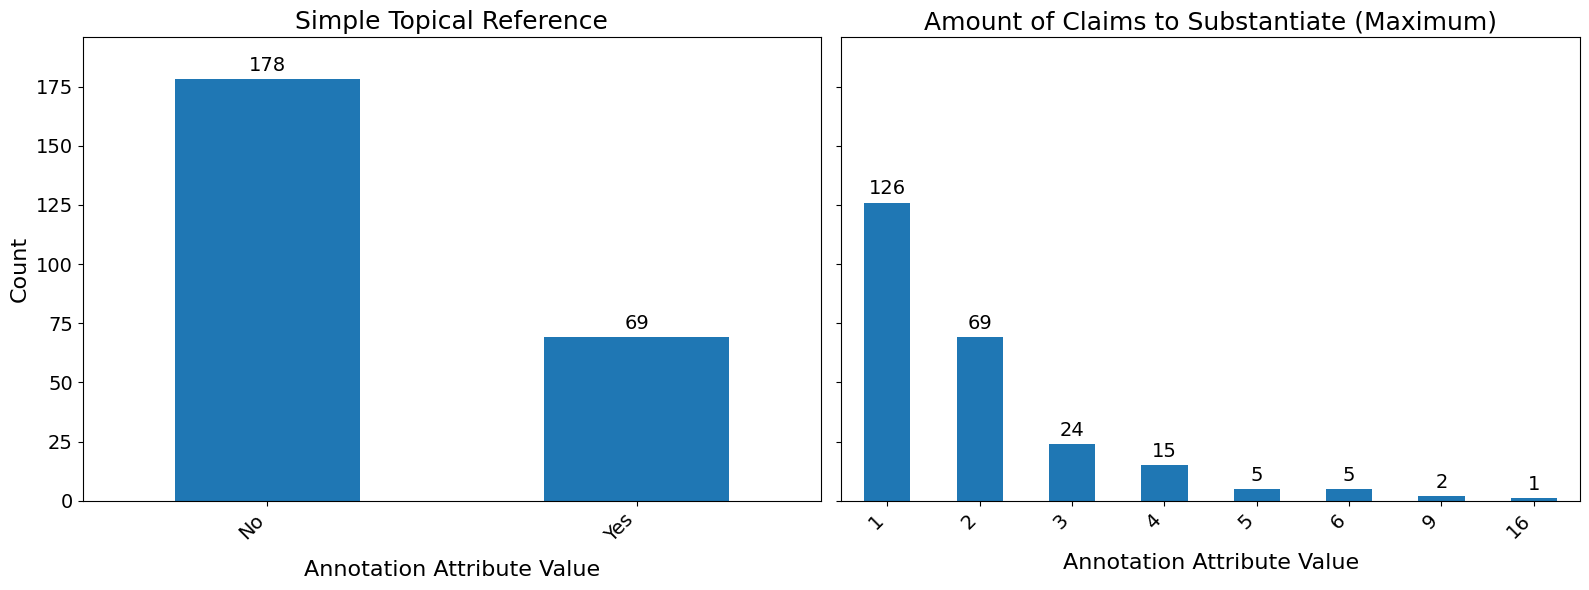

In [36]:
show_distribution_dict_comparison(annotation_attributes_dict, save_title="dist_subst_claims_topical_reference", left_xlabel_pad=10, right_xlabel_pad=8, attribute_name_changes=attribute_name_changes)